In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import KNNImputer

In [3]:
data = pd.read_csv("ola_driver_scaler.csv")

# Understanding the give Ola Drivers Data set

    Dataframe shape
    head and tail
    dtypes
    describe

In [4]:
data.shape

(19104, 14)

In [5]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [6]:
data.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [7]:
data.dtypes

Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [8]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


## Preparing the data


*   Checking if there is null
*   Dropping the irrelavant rows
*   Renaming Columns
*   Feature Creation

In [9]:
data.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [10]:
# @title Dropping Irrelavent column.
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [11]:
# @title Checking any duplicate data entry
data.loc[data.duplicated()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


In [12]:
# @title Converting date related object fields to data type

data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_3688\3854491336.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_3688\3854491336.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_3688\3854491336.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])


In [13]:
data.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [14]:
# @title Looking into the data of a particular driver.

data[data["Driver_ID"] == 22]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
88,2019-01-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,216170,2
89,2019-02-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,404600,2
90,2019-03-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,819960,2
91,2019-04-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,601680,4
92,2019-05-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,635700,4
93,2019-06-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,121590,4
94,2019-07-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,653680,4
95,2019-08-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,1120560,4
96,2019-09-01,22,40.0,0.0,C10,2,31224,2018-05-25,NaT,1,1,696920,4
97,2019-10-01,22,NaN,0.0,C10,2,31224,2018-05-25,NaT,1,1,200000,3


In [15]:
# @title Check for missing values and Prepare data for KNN Imputation
def update_Age_Gender(data):
    # create an object for KNNImputer
    imputer = KNNImputer(n_neighbors=2)
    data[["Gender","Age"]] = imputer.fit_transform(data[["Gender","Age"]])
    return data

In [16]:
## Updating the age gender NAN value using KNN Imputer.
data = data.groupby(['Driver_ID']).apply(update_Age_Gender).reset_index(drop=True)

In [17]:
##check data
data.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

Now we have only Lastworking day left with NAN. So Assuming that a will have only one last working day with the company we can duplicate the value and later we can group by and aggregate it.

In [18]:
# @title Update the last working date of the drivers with NAN values.
def udpate_lwd(data):

    non_nan_values = data["LastWorkingDate"].dropna().unique()
    if len(non_nan_values) > 0:
       non_nan_value = non_nan_values[0]
       data["LastWorkingDate"].fillna(non_nan_value, inplace=True)

    return data

In [19]:
data = data.groupby(['Driver_ID']).apply(udpate_lwd).reset_index(drop=True)
data.head(15)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1


#### Creating new feature columns.

In [20]:
# @title Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

data['Increased_Rating'] = (data['Quarterly Rating'] > data.groupby('Driver_ID')['Quarterly Rating'].shift(1)) * 1

In [21]:
# @title Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

data['target'] = np.where(data['LastWorkingDate'].isna(), 0, 1)

In [22]:
# @title Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

data['Increased_Income'] = (data['Income'] > data.groupby('Driver_ID')['Income'].shift(1)) * 1

In [23]:
# @title Create a column ride taken. count the number of times driver reported using the column "MMMM-YY"

data['ride_taken'] = data.groupby('Driver_ID')['MMM-YY'].transform('count')

In [24]:
# @title Create a column which tells whether driver grade were increase or not. if increased then assign 1 else 0

data['Grade_Increased'] = (data['Grade'] > data['Joining Designation']).astype(int)

In [25]:
# @title Create a column which have details if driver's grade increased.

data['Grade_Increased_diff'] = (data['Grade'] - data['Joining Designation']).astype(int)

In [26]:
data.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Increased_Rating,target,Increased_Income,ride_taken,Grade_Increased,Grade_Increased_diff
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,2381060,2,0,1,0,3,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,-665480,2,0,1,0,3,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,1,0,3,0,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,2,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,2,0,0


In [27]:
# @title Aggregating Data set.
# Aggregate data in order to remove multiple occurrences of same driver data by storing unique Driver IDs in an empty dataframe and then bring all the features at same level

driver_data= data.groupby('Driver_ID').agg(
    {'Gender': 'first',
     'Age': 'max',
     'City': 'last',
     'Education_Level': 'max',
     'Grade': 'last',
     'Total Business Value':'sum',
     'Quarterly Rating': 'last',
     'Income': 'mean',
     'Increased_Rating': 'max',
     'target': 'max',
     'Grade_Increased': 'max',
     'Grade_Increased_diff': 'max',
     'Increased_Income': 'max'}).reset_index()

driver_data.head()


,Driver_ID,Gender,Age,City,Education_Level,Grade,Total Business Value,Quarterly Rating,Income,Increased_Rating,target,Grade_Increased,Grade_Increased_diff,Increased_Income
0,1,0.0,28.0,C23,2,1,1715580,2,57387.0,0,1,0,0,0
1,2,0.0,31.0,C7,2,2,0,1,67016.0,0,0,0,0,0
2,4,0.0,43.0,C13,2,2,350000,1,65603.0,0,1,0,0,0
3,5,0.0,29.0,C9,0,1,120360,1,46368.0,0,1,0,0,0
4,6,1.0,31.0,C11,1,3,1265000,2,78728.0,1,0,0,0,0


In [28]:
# @title Dropping Driver_ID column as its not relevant any more.
driver_data.drop(["Driver_ID"], axis=1, inplace=True)

## Analysing the aggregated data.


*   Checking Corelation
*   Ploting different graphs



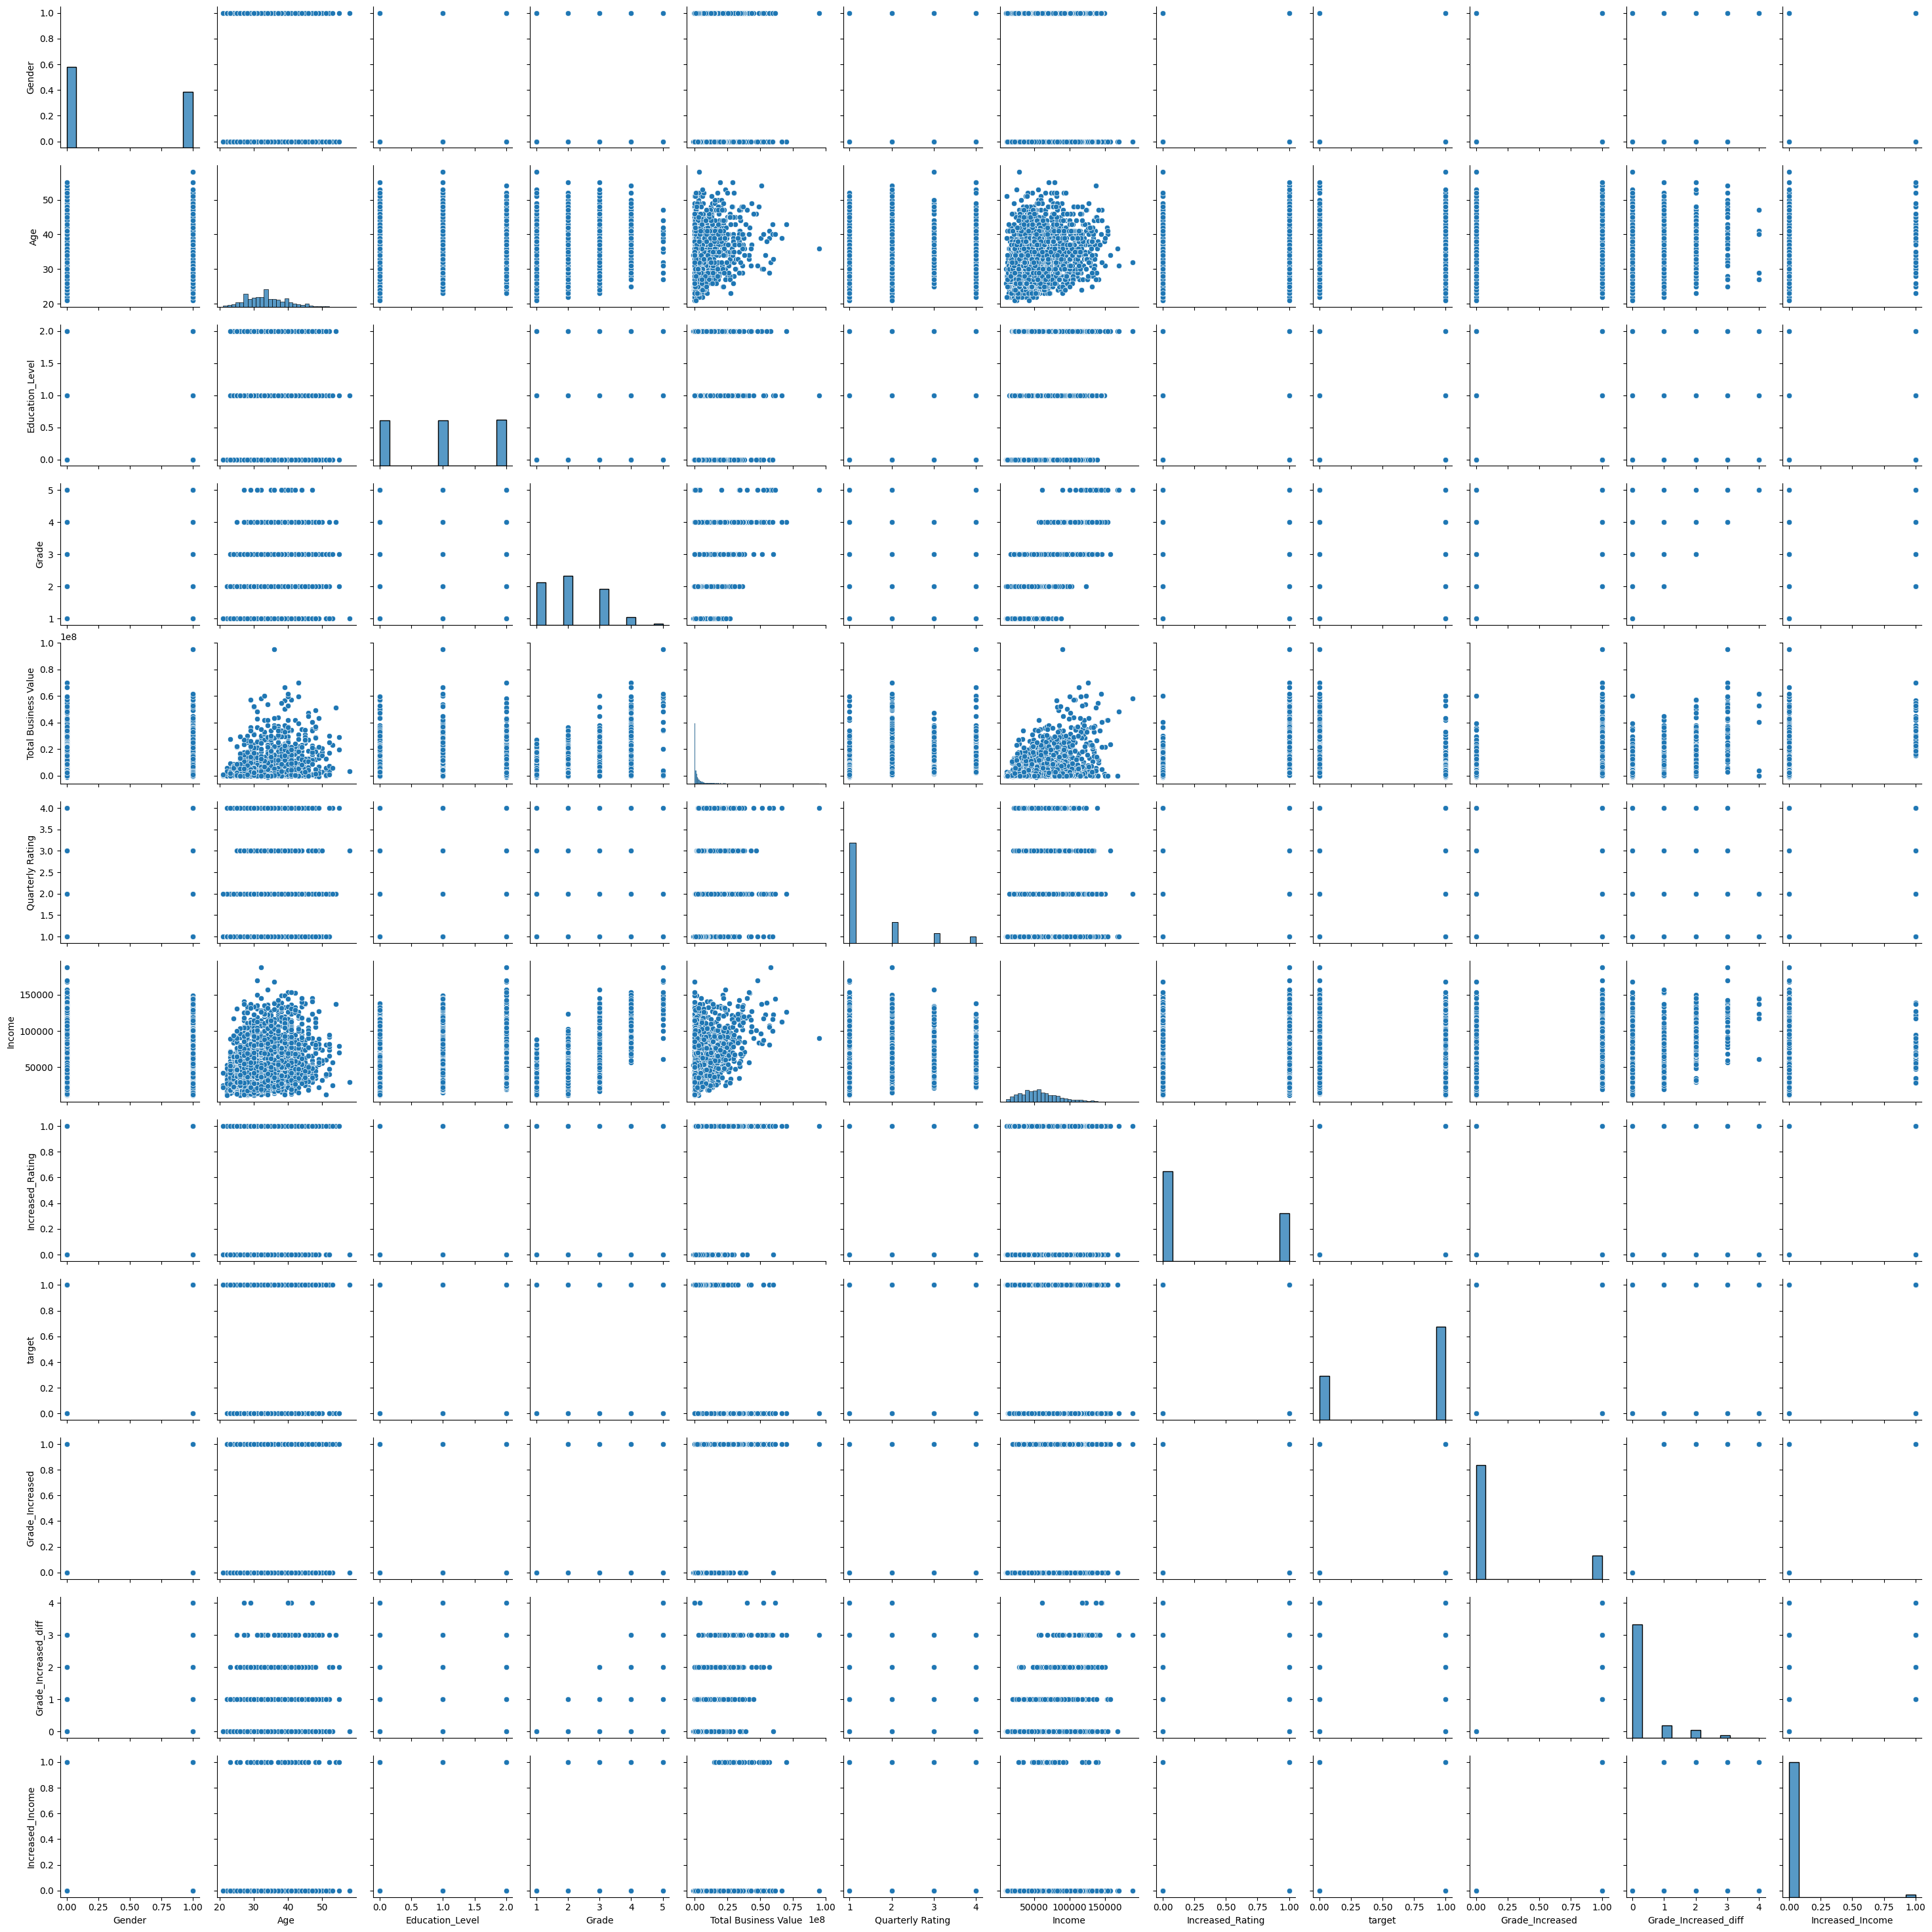

In [29]:
# @title Pair plot for the driver data
sns.pairplot(driver_data)

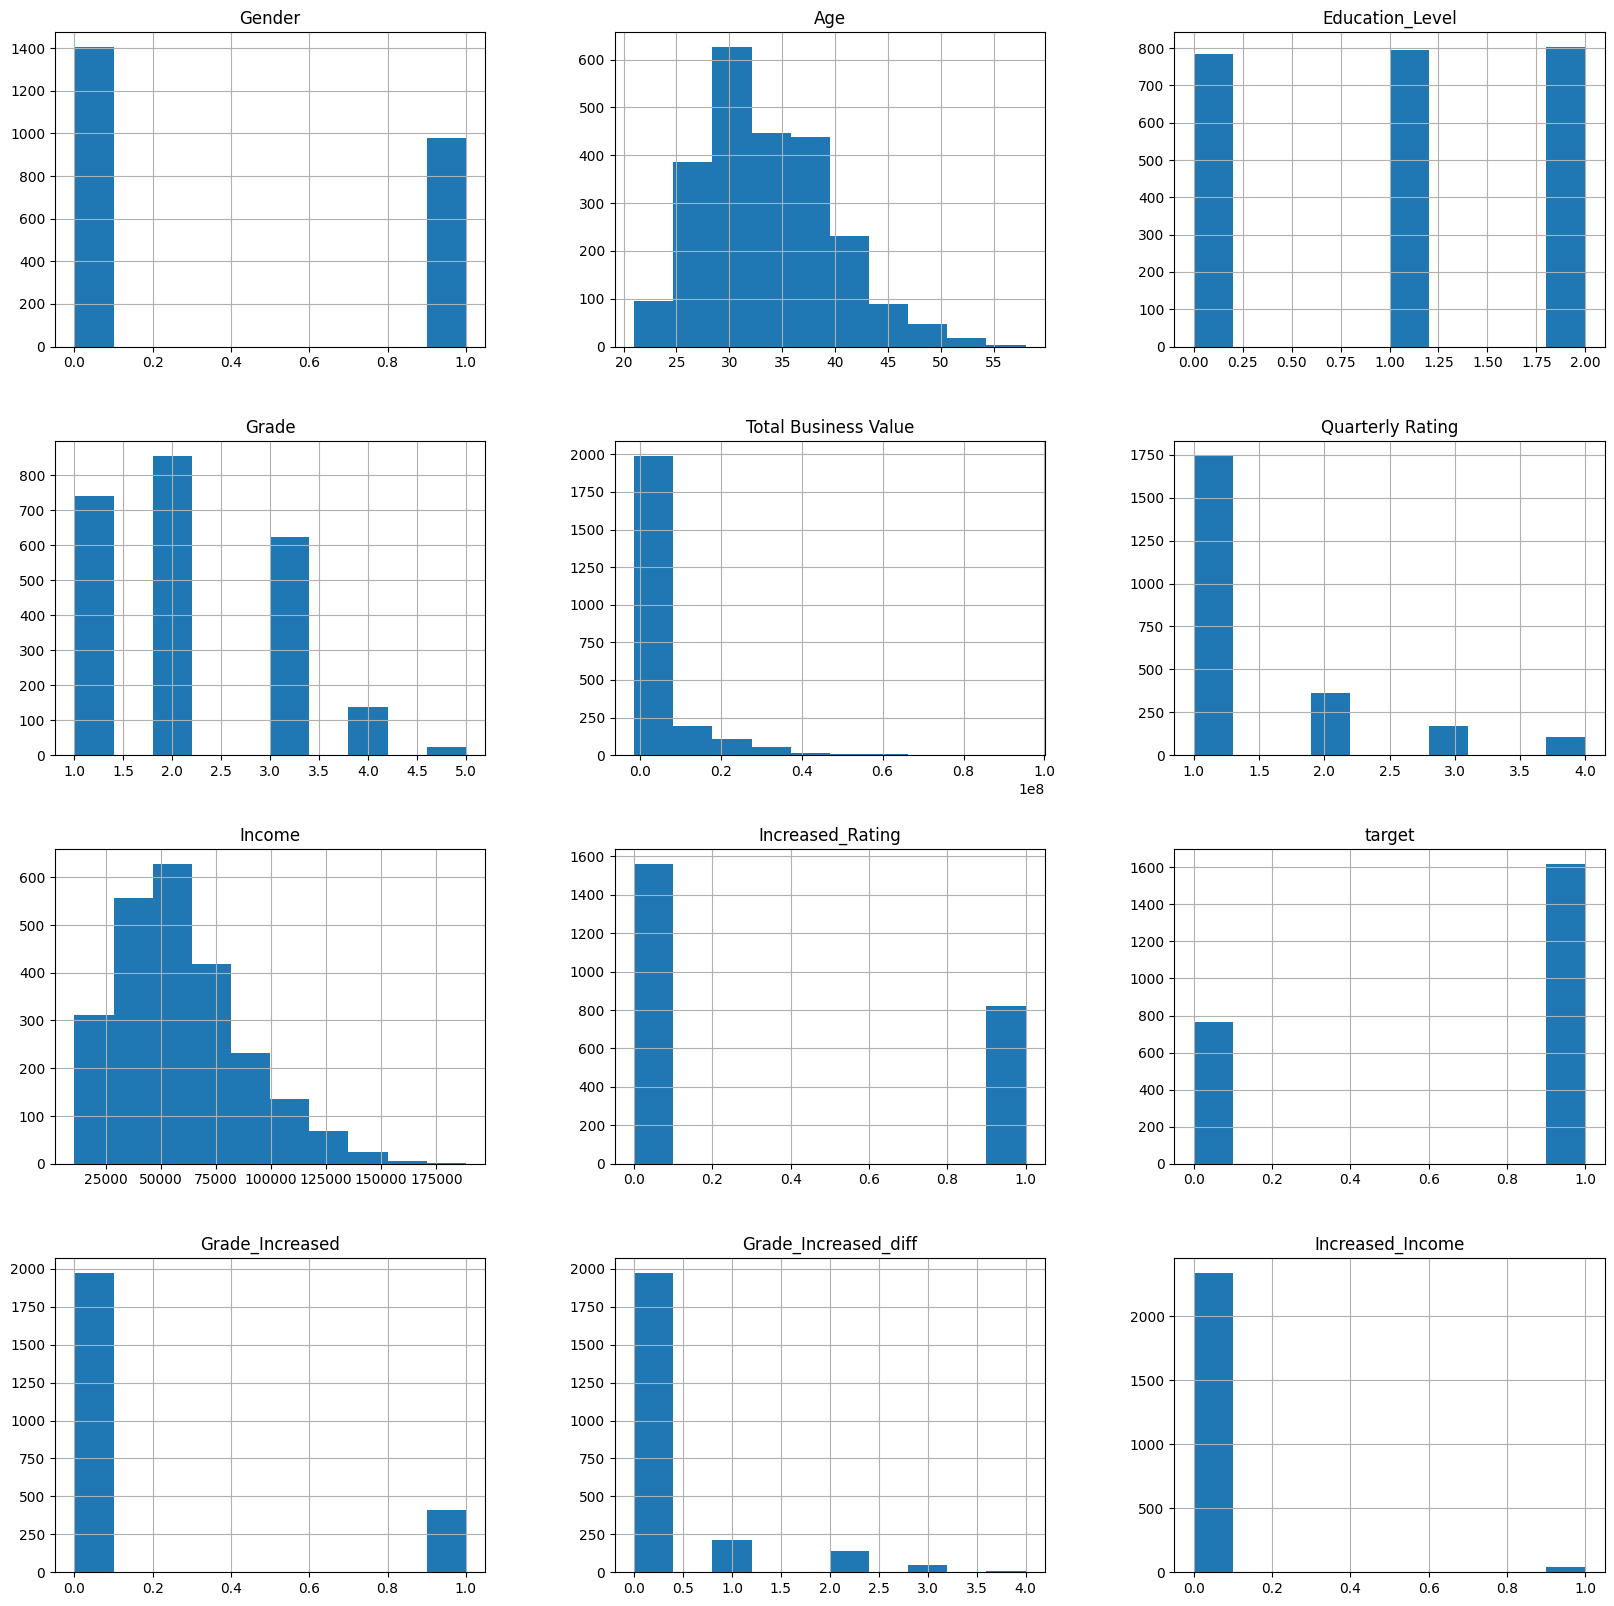

In [30]:
driver_data.hist(figsize = (20,20))
plt.show()

In [31]:
# @title Heat map of driver data.
# Explore the correlation matrix and capture the correlation.
num_df = driver_data
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'C23'

In [32]:
driver_data.head(15)

,Gender,Age,City,Education_Level,Grade,Total Business Value,Quarterly Rating,Income,Increased_Rating,target,Grade_Increased,Grade_Increased_diff,Increased_Income
0,0.0,28.0,C23,2,1,1715580,2,57387.0,0,1,0,0,0
1,0.0,31.0,C7,2,2,0,1,67016.0,0,0,0,0,0
2,0.0,43.0,C13,2,2,350000,1,65603.0,0,1,0,0,0
3,0.0,29.0,C9,0,1,120360,1,46368.0,0,1,0,0,0
4,1.0,31.0,C11,1,3,1265000,2,78728.0,1,0,0,0,0
5,0.0,34.0,C2,0,3,0,1,70656.0,0,1,0,0,0
6,1.0,28.0,C19,2,1,0,1,42172.0,0,0,0,0,0
7,0.0,35.0,C23,2,1,2607180,1,28116.0,0,1,0,0,0
8,0.0,31.0,C19,2,4,10213040,1,119227.0,1,1,1,3,0
9,1.0,39.0,C26,0,3,0,1,19734.0,0,0,0,0,0


In [33]:
# @title Ride taken by Driver churn

sns.barplot(x = 'ride_taken', y = 'target', data = driver_data)

ValueError: Could not interpret input 'ride_taken'

# Start applying ML Agrothim on the final data.

## Checking the data Imbalance

In [34]:
driver_data["target"].value_counts()

target
1    1616
0     765
Name: count, dtype: int64

In [35]:
driver_data["Increased_Rating"].value_counts()

Increased_Rating
0    1558
1     823
Name: count, dtype: int64

In [36]:
driver_data["Increased_Income"].value_counts()

Increased_Income
0    2337
1      44
Name: count, dtype: int64

In [37]:
driver_data["Grade_Increased"].value_counts()

Grade_Increased
0    1973
1     408
Name: count, dtype: int64

Clearly we can see there is huge imbalance in the data.

The traget column contains the value count of the driver who left vs who are still working with OLA.

### Clearly the is a data imbalance is observed.

In [38]:
final_data = driver_data
target = final_data['target'].copy()
final_data = final_data.drop(["target"], axis = 1)

In [39]:
final_data.head()

,Gender,Age,City,Education_Level,Grade,Total Business Value,Quarterly Rating,Income,Increased_Rating,Grade_Increased,Grade_Increased_diff,Increased_Income
0,0.0,28.0,C23,2,1,1715580,2,57387.0,0,0,0,0
1,0.0,31.0,C7,2,2,0,1,67016.0,0,0,0,0
2,0.0,43.0,C13,2,2,350000,1,65603.0,0,0,0,0
3,0.0,29.0,C9,0,1,120360,1,46368.0,0,0,0,0
4,1.0,31.0,C11,1,3,1265000,2,78728.0,1,0,0,0


In [40]:
# @title Spliting the data in train and test with 80 / 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1785, 12)
Number transactions y_train dataset:  (1785,)
Number transactions X_test dataset:  (596, 12)
Number transactions y_test dataset:  (596,)


In [41]:
X_train.head()

,Gender,Age,City,Education_Level,Grade,Total Business Value,Quarterly Rating,Income,Increased_Rating,Grade_Increased,Grade_Increased_diff,Increased_Income
72,1.0,45.0,C3,0,2,3248870,1,62298.0,0,0,0,0
2019,1.0,43.0,C29,1,2,13233930,1,35133.0,0,1,1,0
1488,0.0,23.0,C22,0,1,0,1,47072.0,0,0,0,0
2047,0.0,26.0,C17,1,1,1368970,1,23711.0,0,0,0,0
897,1.0,37.0,C7,0,2,754590,1,47696.0,0,0,0,0


In [42]:
y_train

72      1
2019    1
1488    1
2047    1
897     1
       ..
2173    1
743     1
1969    1
2343    1
297     0
Name: target, Length: 1785, dtype: int32

In [43]:
!pip install category_encoders


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# @title Encoding the city column
### Hyper parameter tu
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['City'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

### Upsampling using SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(y_sm.value_counts()))

Resampled dataset shape target
1    1211
0    1211
Name: count, dtype: int64


In [46]:
X_sm.head()

,Gender,Age,City,Education_Level,Grade,Total Business Value,Quarterly Rating,Income,Increased_Rating,Grade_Increased,Grade_Increased_diff,Increased_Income
0,1.0,45.0,0.661544,0,2,3248870,1,62298.0,0,0,0,0
1,1.0,43.0,0.592076,1,2,13233930,1,35133.0,0,1,1,0
2,0.0,23.0,0.607729,0,1,0,1,47072.0,0,0,0,0
3,0.0,26.0,0.748713,1,1,1368970,1,23711.0,0,0,0,0
4,1.0,37.0,0.713332,0,2,754590,1,47696.0,0,0,0,0


## Hyper parameter tuning

In [47]:
# @title Tuning the **max_depth** hyperparameter to improve the model performance.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth: {depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth: 3 Accuracy Mean: Train: 74.74524337820144 Validation: 73.69197020712173
K-Fold for depth: 3 Accuracy Std: Train: 1.96979195340875 Validation: 10.969410804571078
***************
K-Fold for depth: 4 Accuracy Mean: Train: 76.11229585156056 Validation: 73.27857701595076
K-Fold for depth: 4 Accuracy Std: Train: 1.7254844576797073 Validation: 10.518669981711016
***************
K-Fold for depth: 5 Accuracy Mean: Train: 77.99775589341125 Validation: 69.69322858211746
K-Fold for depth: 5 Accuracy Std: Train: 1.645682707234318 Validation: 6.260943288371824
***************
K-Fold for depth: 67 Accuracy Mean: Train: 100.0 Validation: 74.48525660646872
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 5.9711869610678185
***************
K-Fold for depth: 9 Accuracy Mean: Train: 87.15466441554287 Validation: 72.50297588681428
K-Fold for depth: 9 Accuracy Std: Train: 1.0399987536146167 Validation: 3.460014149526362
***************
K-Fold for depth: 11 Accuracy Mean: Train: 92

In [48]:
# @title Training with the best parameters - for depth: 3
max_depth = 3
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=max_depth)
tree_clf=tree_clf.fit(X_sm, y_sm)
pred = tree_clf.predict(X_test)

In [49]:
print("Train accuracy: {:.2f}".format(tree_clf.score(X_sm, y_sm)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(X_test, y_test)*100))

Train accuracy: 74.11
Test accuracy: 79.53


### Ploting Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

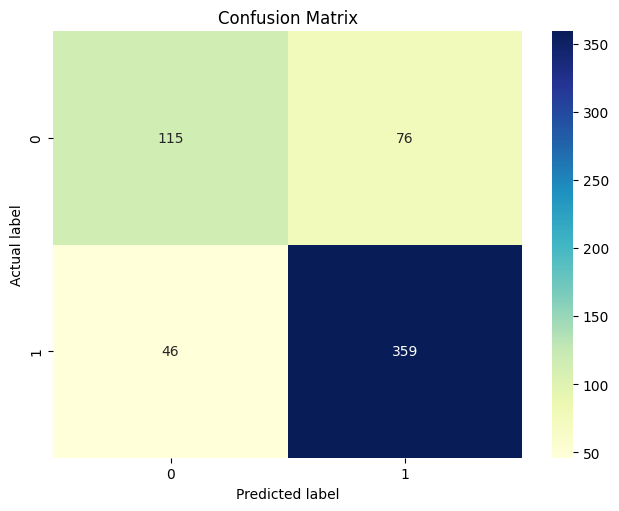

In [50]:
# @title Plotting the confusion matrix for test data to visiulize  **TP**, **TN**, **FN**, **FP**.

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
importances = tree_clf.feature_importances_
importances

array([0.        , 0.        , 0.00300933, 0.01683061, 0.        ,
       0.04795208, 0.77602924, 0.04833371, 0.        , 0.06181628,
       0.04602875, 0.        ])

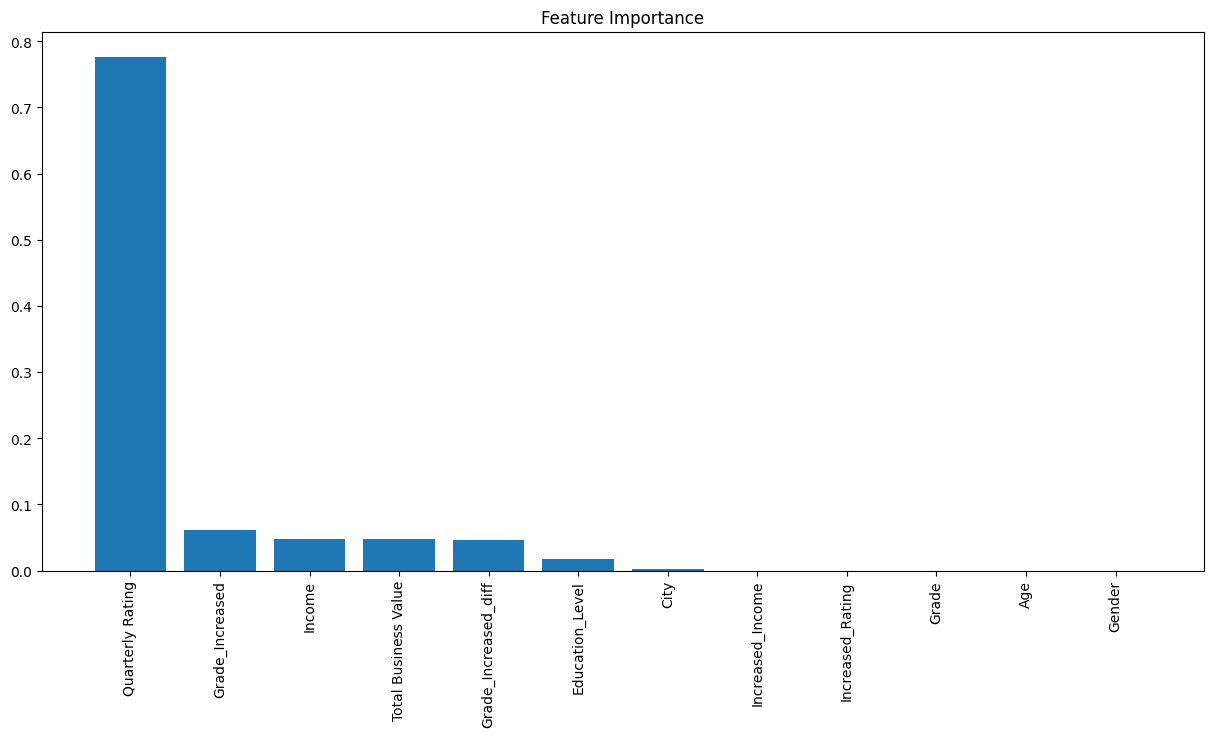

In [52]:
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Using Bagging Method(Random Forest Alogrithm)

In [53]:
# @title Randomly apply RF classifier.
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [54]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \"Train: {cv_acc_results['train_score'].mean()*100:.2f},  Validation: {cv_acc_results['test_score'].mean()*100:.2f}\"")
print(f"K-Fold Accuracy Std: \"Train: {cv_acc_results['train_score'].std()*100:.2f},  Validation: {cv_acc_results['test_score'].std()*100:.2f}\"")

K-Fold Accuracy Mean: "Train: 77.19,  Validation: 74.27"
K-Fold Accuracy Std: "Train: 0.46,  Validation: 9.49"


We can see that there is not much impact here. Now we need further optimize and hyper tune the RF parameters.

In [55]:
# @title Using Grid searchCV for parameter tuning.
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [56]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [57]:
grid.fit(X_sm, y_sm)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 400}
Best score:  0.817112333909971


In [58]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=10, max_features=8, n_estimators=300)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2,  X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \"Train: {cv_acc_results['train_score'].mean()*100:.3f}, Validation: {cv_acc_results['test_score'].mean()*100:.3f}\"")
print(f"K-Fold Accuracy Std: \"Train: {cv_acc_results['train_score'].std()*100:.3f},  Validation: {cv_acc_results['test_score'].std()*100:.3f}\"")

K-Fold Accuracy Mean: "Train: 94.738, Validation: 81.501"
K-Fold Accuracy Std: "Train: 0.663,  Validation: 2.545"


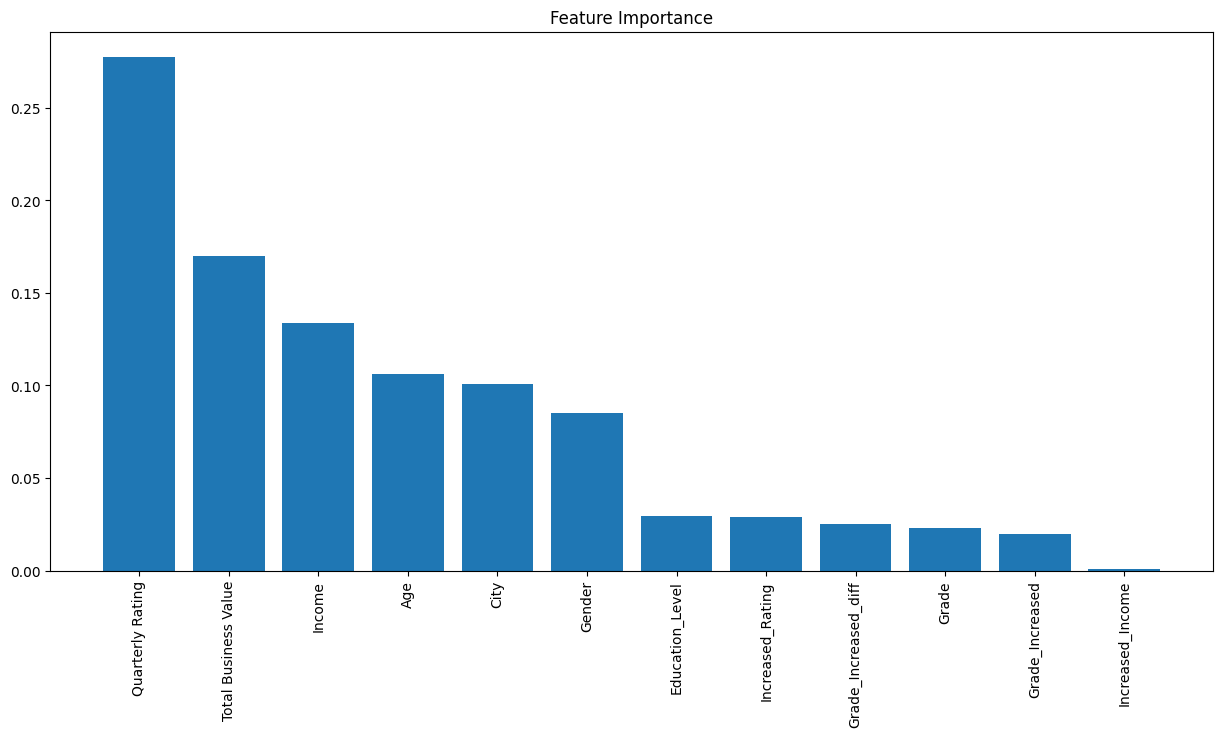

In [59]:
# @title Checking Feature importance.
clf2.fit(X_sm, y_sm)
importances = clf2.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Using Gradient Booting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

In [62]:
gbc.fit(X_sm, y_sm)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [63]:
# @title Train score
gbc.score(X_sm, y_sm)

0.8393889347646573

In [64]:
# @title Test score
gbc.score(X_test, y_test)

0.7768456375838926

Observe that train score is higher than the test score. Clearly case of overfitting.

### Hyper typing of the parameters.

In [65]:
# @title Using Ramdonized Search cv.

from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RandomForestClassifier(n_jobs = -1)
clf_new = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf_new.fit(X_sm, y_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [66]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:03.117779


Clearly there is an increase in performance.

In [67]:
res = clf_new.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 10, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.7799422135522103 Rank: 5
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 3} Mean_score: 0.7398791923802047 Rank: 10
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 10} Mean_score: 0.8030695727565321 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.781593912179322 Rank: 4
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.7720952392637033 Rank: 7
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.7568138319408148 Rank: 8
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.7741579455343303 Rank: 6
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.791916645196118 Rank: 2
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.7431836120415015 Rank: 9
Parameter

In [68]:
print(clf_new.best_estimator_)

RandomForestClassifier(max_depth=10, max_leaf_nodes=80, n_estimators=50,
                       n_jobs=-1)


In [69]:
rf = clf_new.best_estimator_

rf.fit(X_sm, y_sm)

print("Model acc",rf.score(X_test, y_test))

Model acc 0.7734899328859061


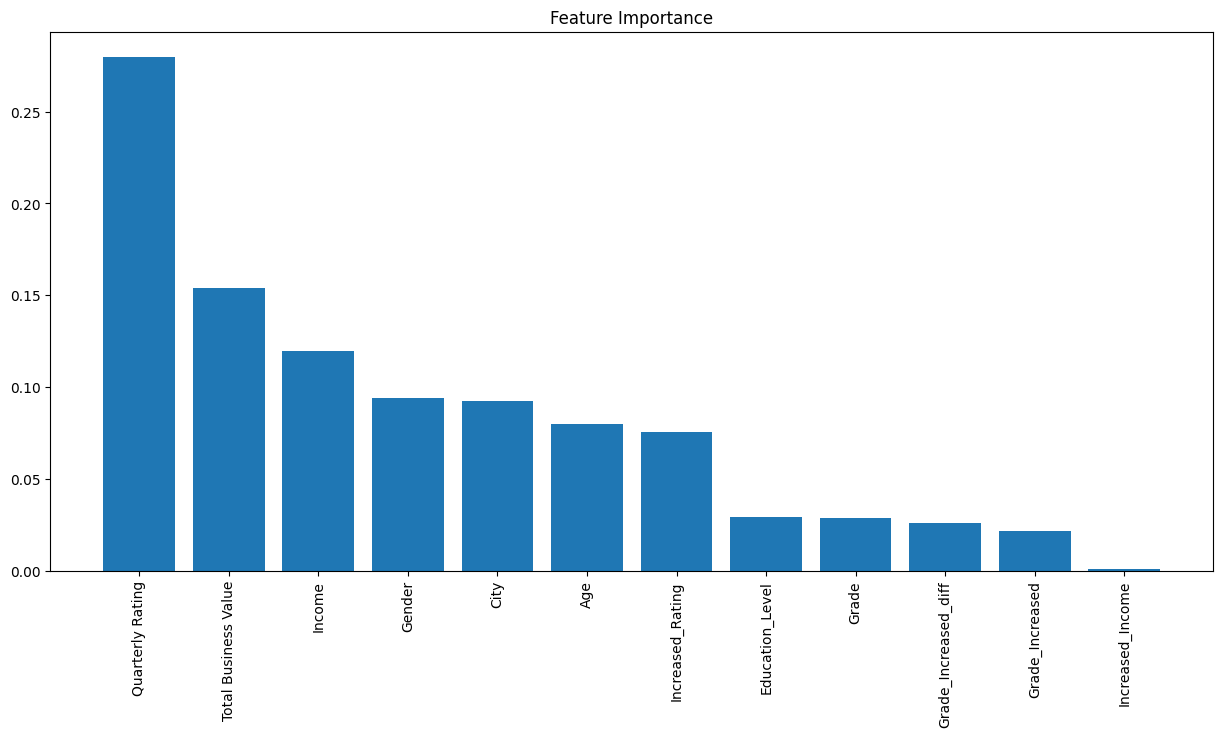

In [70]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [71]:
# @title Using GBDT.

params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [72]:
gbc = GradientBoostingClassifier()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start_t = dt.datetime.now()

clf.fit(X_sm, y_sm)

end_t = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [73]:
print(f"Time taken for fits : {end_t - start_t}")

Time taken for fits : 0:00:11.551043


In [74]:
print(clf.best_estimator_)

GradientBoostingClassifier(max_depth=7, max_leaf_nodes=80, n_estimators=150)


In [75]:
gbc = clf.best_estimator_

gbc.fit(X_sm, y_sm)

print("Model acc",gbc.score(X_test, y_test))

Model acc 0.785234899328859


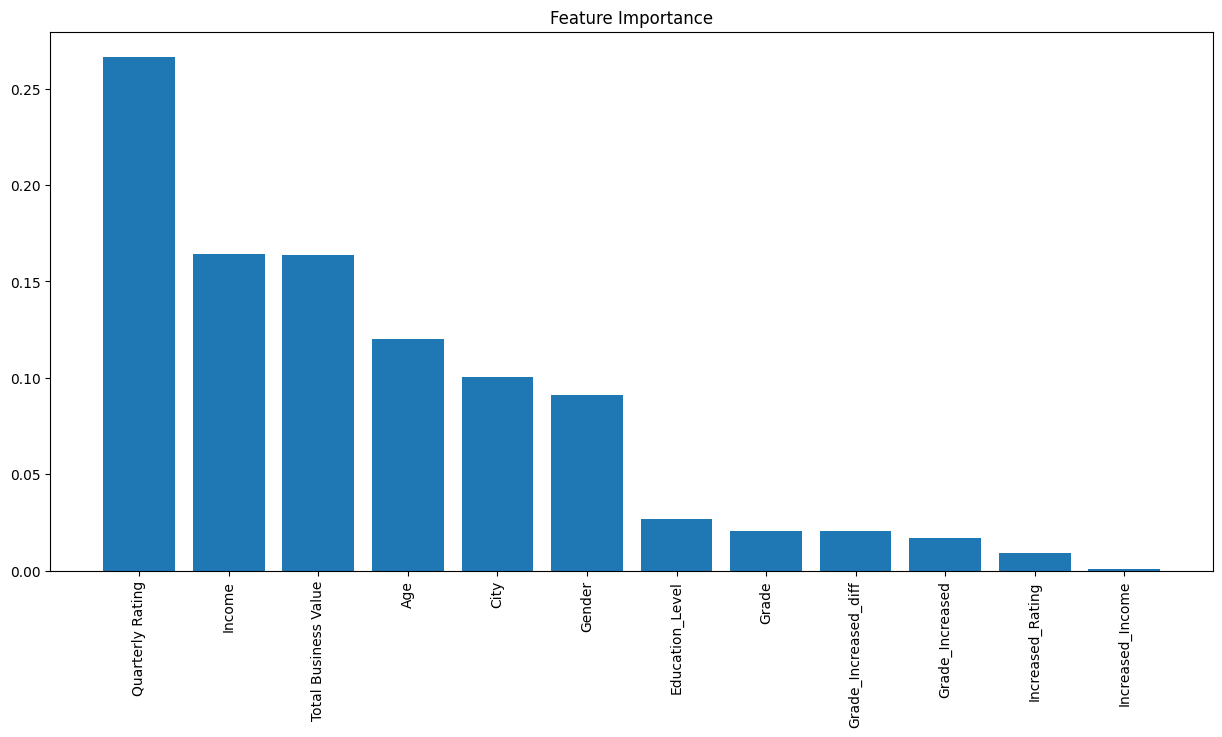

In [76]:
importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot